In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install sidetable

  Created wheel for sidetable: filename=sidetable-0.3.0-cp36-none-any.whl size=9391 sha256=e2c9bfb7be544ac7d426bd731aa4213ed36d01c25f97ce9fd5a25cf18b812bc4
  Stored in directory: /root/.cache/pip/wheels/cb/89/c8/8523a369438a97da6e37ade1cf5bb7ba6f7638a42ebc22594c
Successfully built sidetable


In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import sidetable
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error  
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/KAGGLE/penguins_size.csv"

'/content/drive/My Drive/KAGGLE/penguins_size.csv'


**To read and view the first few dataframes from the dataset.**

In [ ]:
#reading the csv file into a dataframe
df = pd.read_csv('/content/drive/My Drive/KAGGLE/penguins_size.csv')
df.tail(2)
#len(df) #gives number of rows 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [ ]:
# to view few metrics of all the columns
# helps us identify categorical and numeric values,mean, media etc.
df.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [ ]:
#this reveals that there is a row with "." in the columns "sex" .
df['sex'].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [ ]:
#Replace the null values and others of the column Sex with its mode 
mode_sex = df['sex'].mode()[0]  
df['sex'].fillna(mode_sex,inplace=True)
df['sex'] = df['sex'].str.replace(".",mode_sex)

In [ ]:
# Filling null values of culmenlen, culmendepth, flipper_length_mm and body_mass_g by their mean 
# grouped by species.

df['culmen_length_mm'].fillna(df.groupby('species')['culmen_length_mm'].transform('mean'),inplace=True)
df['culmen_depth_mm'].fillna(df.groupby('species')['culmen_depth_mm'].transform('mean'),inplace=True)
df['flipper_length_mm'].fillna(df.groupby('species')['flipper_length_mm'].transform('mean'),inplace=True)
df['body_mass_g'].fillna(df.groupby('species')['body_mass_g'].transform('mean'),inplace=True)

In [ ]:
#To recheck after the null values are handled.
df.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,344.000000,344.000000,344.000000,344.000000,344
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,179
mean,NaN,NaN,43.917431,17.148339,200.930641,4202.839182,NaN
std,NaN,NaN,5.454118,1.973561,14.060613,801.461347,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.200000,15.575000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.250000,4756.250000,NaN


     species  Count   Percent  Cumulative Count  Cumulative Percent
0     Adelie    152  0.441860               152            0.441860
1     Gentoo    124  0.360465               276            0.802326
2  Chinstrap     68  0.197674               344            1.000000


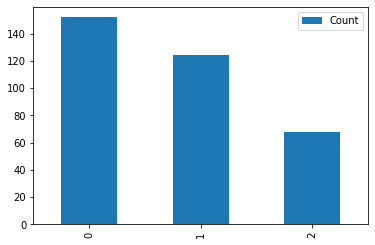

In [ ]:
#This package Sideplot helps us plot easily which takes more lines if done using value_counts().
print(df.stb.freq(['species']))
df.stb.freq(['species']).Count.plot(kind='bar',legend=True)
#plt.xlabel(df.stb.freq(['species']))
plt.show()

#My Idea is to predict the species based on the other features. So, this would help me understand if the dataset is unbalanced/not.

      sex  Count   Percent  Cumulative Count  Cumulative Percent
0    MALE    179  0.520349               179            0.520349
1  FEMALE    165  0.479651               344            1.000000


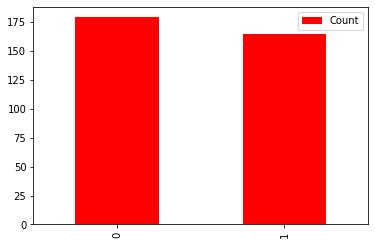

In [ ]:
print(df.stb.freq(['sex']))
df.stb.freq(['sex']).Count.plot(kind='bar',color='r', legend=True)
#plt.xlabel(df.stb.freq(['species']))
plt.show()

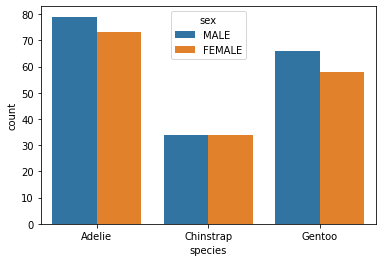

In [ ]:
#converting species to Categories, 0,1 and 2
sns.countplot(x="species", hue="sex", data=df)
plt.show()

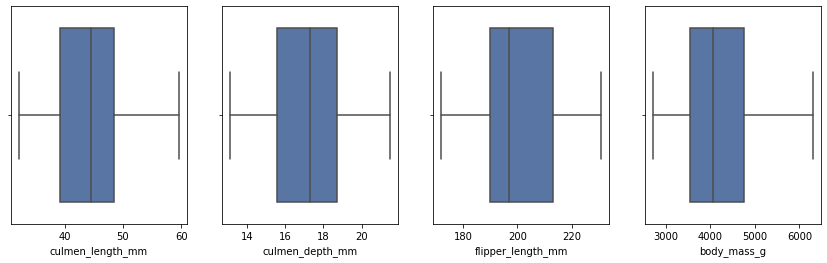

In [ ]:
#Box plots would help us identify if there any outliers and how's the data spread out.
f, axes = plt.subplots(1, 4,)
plt.subplots_adjust(right=2)
sns.set(style="whitegrid")
sns.boxplot(  x = "culmen_length_mm", data=df,  ax=axes[0])
#plt.xlabel("culmen_length")
sns.boxplot(  x= "culmen_depth_mm", data=df, ax=axes[1])
sns.boxplot(  x= "flipper_length_mm", data=df,   ax=axes[2])
sns.boxplot(  x= "body_mass_g", data=df,   ax=axes[3])
plt.show()

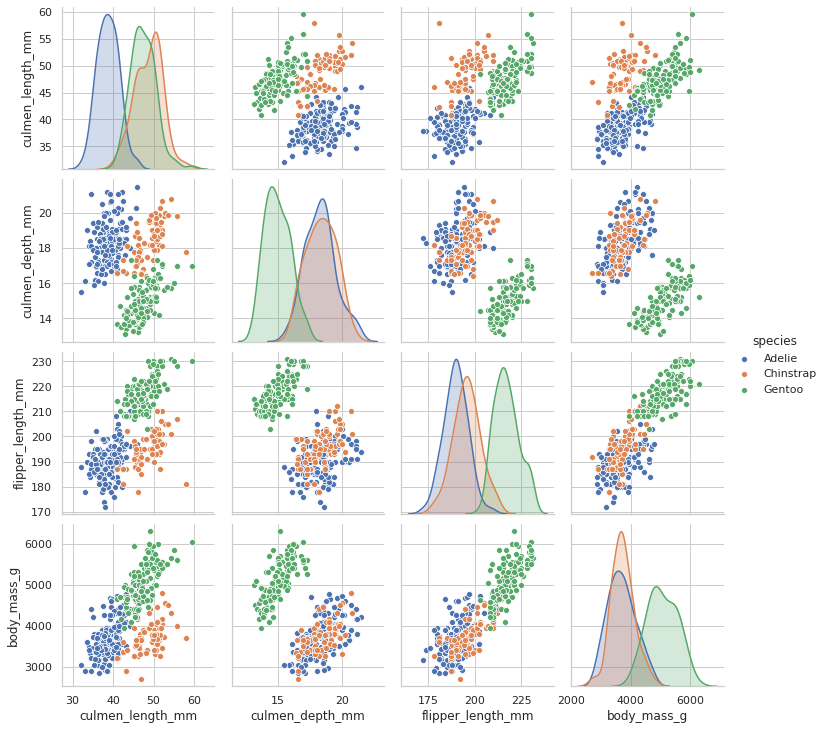

In [ ]:
# Pair Plot below helps us understand the relationship between all the numerical features.
sns.pairplot(df,hue='species')
plt.show()

In [ ]:
#converting species to Categories, 0,1 and 2 to help us for our classification using the model
df['species'] = df['species'].astype('category')
df['species'] = df['species'].cat.codes
df['species'].unique()

array([0, 1, 2], dtype=int8)

Modelling - To predict the species based on the other features.

From the above pairplot, it looks like culmen_length and flipper_length would help us classify into respective classes (here, species). So, retaining only these two columns as of now and checking the accuracy.

In [ ]:
myscaler = StandardScaler()
myscaler.fit(X = df.drop(['species','island','sex','culmen_depth_mm','body_mass_g'], axis = 1))
X = myscaler.transform(X = df.drop(['species','island','sex','culmen_depth_mm','body_mass_g'], axis = 1))
df_new  = pd.DataFrame(X, columns=['çulmen_length','flipper_length_mm'])
df_new.head()

,çulmen_length,flipper_length_mm
0,-0.884552,-1.419545
1,-0.811106,-1.063424
2,-0.664214,-0.422406
3,-0.941217,-0.781829
4,-1.325227,-0.564854


In [ ]:
df_new['species'] = df['species']
df_new.tail(3)

,çulmen_length,flipper_length_mm,species
341,1.190296,1.500649,2
342,0.235499,0.788407,2
343,1.098488,0.859631,2


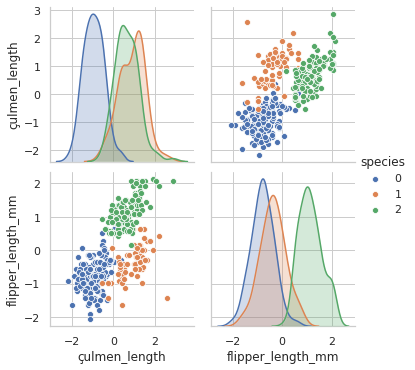

In [ ]:
sns.pairplot(df_new,hue='species')
plt.show()

In [ ]:
#Defining the class

y = df['species']

In [ ]:
#60-50 train and test percentages
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)
myKNN = KNeighborsClassifier(n_neighbors = 1)
myKNN.fit(X_train, y_train)
y_predict = myKNN.predict(X_test)
print(confusion_matrix(y_test,y_predict))
#shows 7 mis-classifications.
print(classification_report(y_test,y_predict))

In [ ]:
#Based on the error versus K, we decide the optimal value for K
err_rates = []
for idx in range(1,5):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train, y_train)
    pred_idx = knn.predict(X_test)
    err_rates.append(sqrt(mean_squared_error(y_test,pred_idx)))
    #err_rates.append(np.mean(y_test != pred_idx))

Text(0.5, 1.0, 'Error Rate vs K-value')

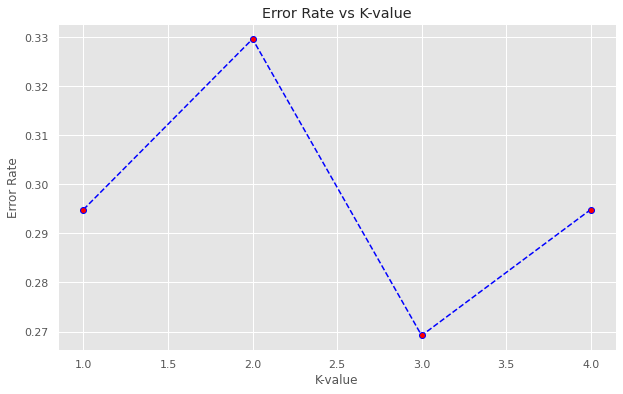

In [ ]:
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,5), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

In [ ]:
myKNN = KNeighborsClassifier(n_neighbors = 3)
myKNN.fit(X_train,y_train)
y_predict = myKNN.predict(X_test)
print('WITH K=3')
print('')
print(confusion_matrix(y_test,y_predict))
print('')
print(classification_report(y_test,y_predict))

WITH K=3

[[50  2  1]
 [ 1 32  2]
 [ 0  1 49]]

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.91      0.91      0.91        35
           2       0.94      0.98      0.96        50

    accuracy                           0.95       138
   macro avg       0.95      0.95      0.95       138
weighted avg       0.95      0.95      0.95       138



USING GRID SERACH CV

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 5)}
#use gridsearch to test all values for n_neighbors
knn_cv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_cv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#check top performing n_neighbors value
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 3}
0.9680306905370845


In [ ]:
from matplotlib.colors import ListedColormap

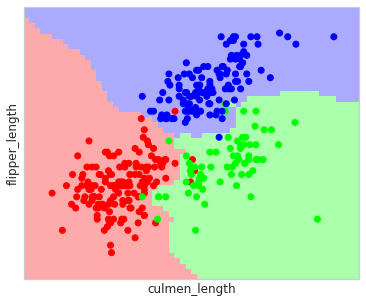

In [ ]:
h = 0.1
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_cv.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 5))
#plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z,cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=y, cmap=cmap_bold )
plt.xlabel('culmen_length')
plt.ylabel('flipper_length')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify=y)

NameError: ignored

In [ ]:
y_predict = knn_cv.predict(X_test)
print('WITH K=3')
print('')
print(confusion_matrix(y_test,y_predict))
print('')
print(classification_report(y_test,y_predict))

WITH K=3

[[91  0  1]
 [ 2 34  1]
 [ 0  2 75]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        92
           1       0.94      0.92      0.93        37
           2       0.97      0.97      0.97        77

    accuracy                           0.97       206
   macro avg       0.97      0.96      0.96       206
weighted avg       0.97      0.97      0.97       206

